# PRJNA731975 - Lin et al.

Article link: [https://journals.asm.org/doi/10.1128/mSystems.01068-21](https://journals.asm.org/doi/10.1128/mSystems.01068-21).

In [1]:
suppressPackageStartupMessages({
    library(provoc)
    library(here)
    library(ggplot2)
    library(lubridate)
})

prj <- "PRJNA731975"
lineages_in_paper <- c("B.1.1.7", "P.1", "B.1.351")


In [2]:
coco <- read.csv(
  here(
    "data/processed/",
    paste0(prj, "_processed.csv.gz")
  )
)
coco$mutation <- parse_mutations(coco$label)
head(coco)


,position,label,mutation,frequency,coverage,count,sra,date,sample_name,avg_spot_len,bases,bioproject,location
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,10046,+10047.T,ins:10047:1,0.00000000,247,0,SRR14621181,2021-04-12,UBC/BCCDC_WWTP2-WW_Wk11_150bp_12/04/2021,302,503569900,PRJNA731975,WWTP2
2,10059,+10060.T,ins:10060:1,0.06477733,247,16,SRR14621181,2021-04-12,UBC/BCCDC_WWTP2-WW_Wk11_150bp_12/04/2021,302,503569900,PRJNA731975,WWTP2
3,10065,+10066.A,ins:10066:1,0.00000000,247,0,SRR14621181,2021-04-12,UBC/BCCDC_WWTP2-WW_Wk11_150bp_12/04/2021,302,503569900,PRJNA731975,WWTP2
4,10301,+10302.A,ins:10302:1,0.00000000,21,0,SRR14621181,2021-04-12,UBC/BCCDC_WWTP2-WW_Wk11_150bp_12/04/2021,302,503569900,PRJNA731975,WWTP2
5,10360,+10361.T,ins:10361:1,0.00000000,0,0,SRR14621181,2021-04-12,UBC/BCCDC_WWTP2-WW_Wk11_150bp_12/04/2021,302,503569900,PRJNA731975,WWTP2
6,10427,+10428.T,ins:10428:1,0.00000000,0,0,SRR14621181,2021-04-12,UBC/BCCDC_WWTP2-WW_Wk11_150bp_12/04/2021,302,503569900,PRJNA731975,WWTP2


In [3]:
barcodes <- provoc::usher_barcodes()
available_lineages <- intersect(lineages_in_paper, rownames(barcodes))
barcodes <- filter_lineages(barcodes, available_lineages)
dim(barcodes)


[1]  3 56

In [4]:
system.time(
    res <- provoc(count / coverage ~ .,
        data = coco,
        lineage_defs = barcodes,
        by = "sra")
)
head(res)


   user  system elapsed 
  1.227   0.065   1.298 

,rho,ci_low,ci_high,lineage,sra,date,sample_name,avg_spot_len,bases,bioproject,location
,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,0.08459929,NA,NA,B.1.1.7,SRR14621181,2021-04-12,UBC/BCCDC_WWTP2-WW_Wk11_150bp_12/04/2021,302,503569900,PRJNA731975,WWTP2
2,0.08753087,NA,NA,P.1,SRR14621181,2021-04-12,UBC/BCCDC_WWTP2-WW_Wk11_150bp_12/04/2021,302,503569900,PRJNA731975,WWTP2
3,0.07903869,NA,NA,B.1.351,SRR14621181,2021-04-12,UBC/BCCDC_WWTP2-WW_Wk11_150bp_12/04/2021,302,503569900,PRJNA731975,WWTP2
4,0.38108147,NA,NA,B.1.1.7,SRR14621182,2021-04-25,UBC/BCCDC_WWTP2-WW_Wk13_1200bp_25/04/2021,518,289599734,PRJNA731975,WWTP2
5,0.37332515,NA,NA,P.1,SRR14621182,2021-04-25,UBC/BCCDC_WWTP2-WW_Wk13_1200bp_25/04/2021,518,289599734,PRJNA731975,WWTP2
6,0.09348270,NA,NA,B.1.351,SRR14621182,2021-04-25,UBC/BCCDC_WWTP2-WW_Wk13_1200bp_25/04/2021,518,289599734,PRJNA731975,WWTP2


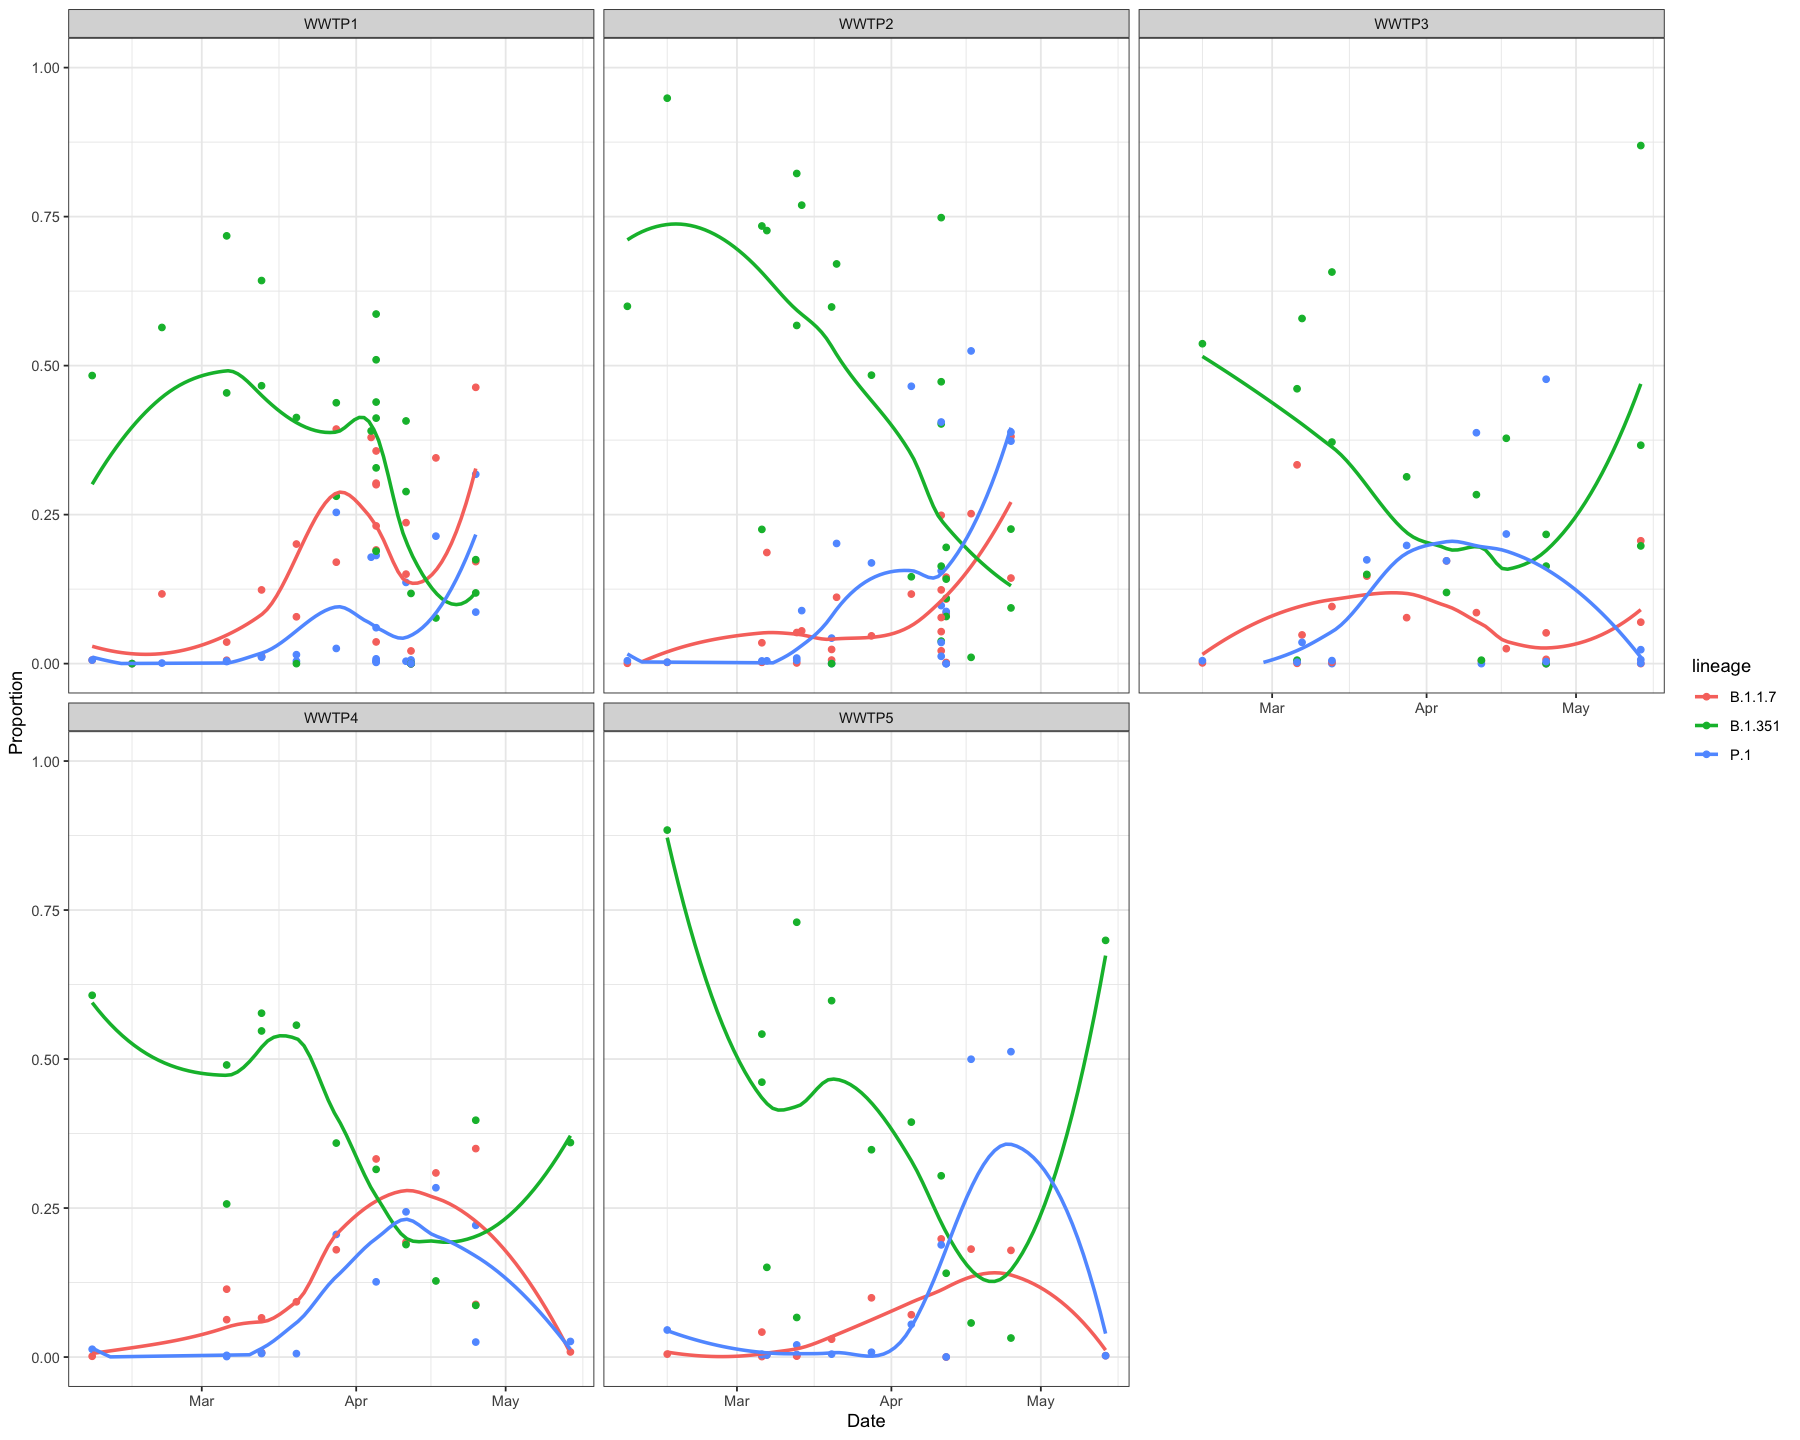

In [5]:
options(repr.plot.width = 15, repr.plot.height = 12)

res$date <- lubridate::ymd(res$date)

gg <- autoplot(res, date_col = "date") + facet_wrap(~location) +
    geom_smooth(formula = y ~ x, se = FALSE, method = "loess") +
    theme_bw()
suppressWarnings(print(gg))
